# Red Wine Quality Prediction 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Data Cleaning

### – Checking null values

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

### – In the graph below, we will look at the quality count of the wine from quality levels 3 to 8 given in the                       dataset.

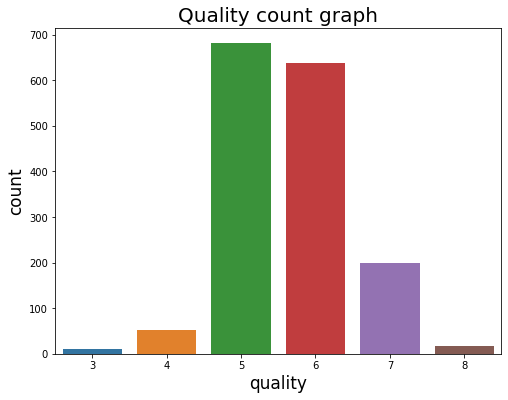

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='quality', data=df)
plt.title('Quality count graph', fontdict={'fontsize':20})
plt.xlabel('quality', fontdict={'fontsize':17})
plt.ylabel('count', fontdict={'fontsize':17})
plt.show()

### – Futhermore, we have classified the quality of the wine in two categories good and bad; good ranging above 5 and bad ranging 5 and below. 

In [7]:
df['quality'] = df['quality'].apply(lambda x: 'bad' if x<=5 else 'good')

In [8]:
df.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [9]:
df.quality = df.quality.map({'bad':0, 'good':1})

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Pearson Correlation

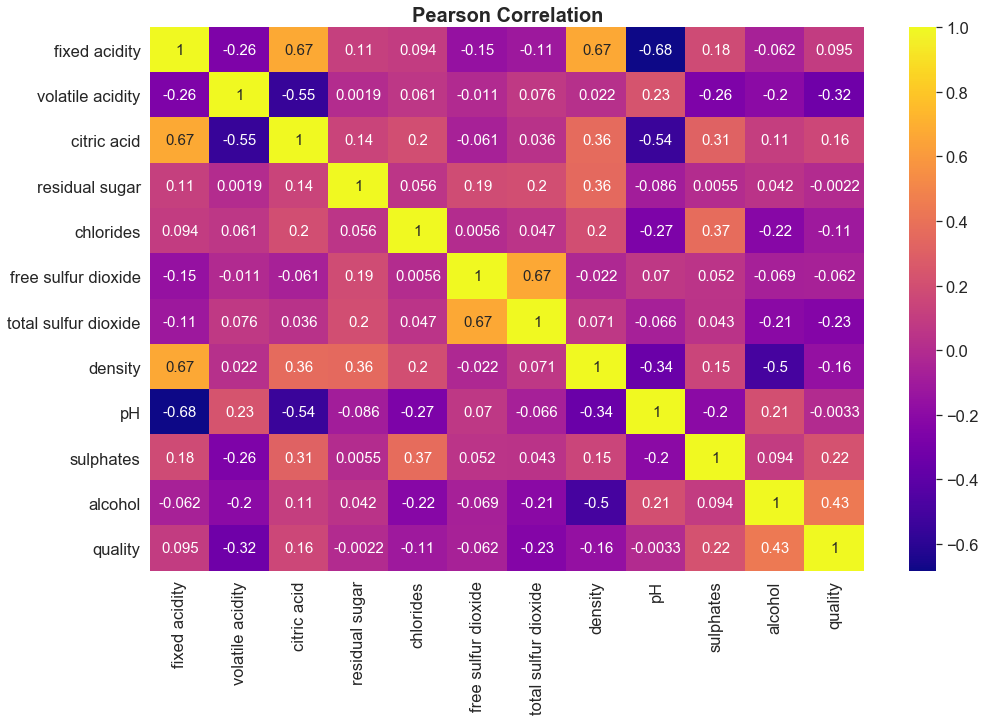

In [11]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='plasma', fmt='.2g', annot_kws={"size": 15})
plt.title('Pearson Correlation', fontdict={'fontname':'arial','fontsize':20, 'fontweight':'bold'})
plt.show()

### Separating the data into predictor variables and target variables.

In [12]:
X = df.drop(['quality'], axis=1)
y = df.quality

### Splitting data into train and test set 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

### We are scaling our data using the formula below:

$$Z = \frac{x-\mu}{\sigma}$$

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # To prevent data leakage

## Principal Component Analysis
### – We are looking for 95% variation in our data using PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(0.95) # 95% variance 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
pca_df = pd.DataFrame(data=X_train_pca)
print(pca_df.shape),
pca_df.head()

(1119, 9)


,0,1,2,3,4,5,6,7,8
0,-1.362875,0.897645,-1.681819,3.042569,0.385282,2.279723,0.800002,-1.207628,-0.894322
1,-1.646550,1.953684,-0.102122,-0.239295,-0.284395,-0.761829,0.129538,-0.660414,0.287184
2,1.367476,-0.003084,-0.393120,0.085789,-0.287974,0.003171,-0.024345,0.819699,-0.378644
3,-2.141605,0.194150,3.561323,-1.529401,-1.758639,1.638755,0.877846,0.407907,-0.135950
4,0.428090,1.592639,2.841350,0.087830,-0.342429,-0.283893,-0.117733,-0.627277,0.233665


In [17]:
print('Number of components: ', pca.n_components_,'\n')
print(pca.explained_variance_ratio_)

Number of components:  9 

[0.283502   0.17194388 0.13937574 0.10771469 0.08979962 0.06179019
 0.05256902 0.03916444 0.0321325 ]


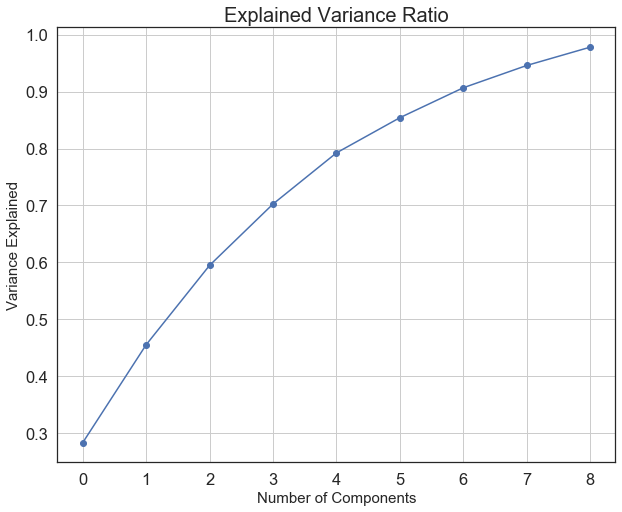

In [18]:
sns.set_style('white')
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components', fontdict={'fontsize':15})
plt.ylabel('Variance Explained', fontdict={'fontsize':15})
plt.title('Explained Variance Ratio', fontdict={'fontsize':20})
plt.grid()
plt.show()

- As we can see in the above graph, 95% of variation of our data is explained by 9 components. 

In [19]:
def accuracy(name, y_true, y_pred):
    return pd.DataFrame({'Algorithm':[name],
                         'Accuracy':[round(accuracy_score(y_true,y_pred),4)]})

# Machine Learning Algorithms 

## 1. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

parameters = {'C':(0.1,0.5,1,1.5,2)}

lr = GridSearchCV(estimator=LogisticRegression(),
                  param_grid=parameters,
                  cv=5, 
                  return_train_score=True)

lr.fit(X_train_pca,y_train)

print('Best Parameters:', lr.best_params_)
print()

y_pred = lr.predict(X_test_pca)

print(classification_report(y_test,y_pred))
print('Accuracy:', round(accuracy_score(y_test,y_pred) * 100, 2),'%')


df = accuracy(name='Logistic Regression', y_true=y_test, y_pred=y_pred)
df

Best Parameters: {'C': 0.5}

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       218
           1       0.79      0.77      0.78       262

    accuracy                           0.77       480
   macro avg       0.76      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480

Accuracy: 76.67 %


,Algorithm,Accuracy
0,Logistic Regression,0.7667


## 2. Random Forest 

In [21]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':(30,40,50,60,70),
              'criterion':('gini', 'entropy')}

rf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                  param_grid=parameters,
                  cv=5, 
                  return_train_score=True)

rf.fit(X_train_pca,y_train)

print('Best Parameters:', rf.best_params_)
print()

y_pred = rf.predict(X_test_pca)

print(classification_report(y_test,y_pred))
print('Accuracy:', round(accuracy_score(y_test,y_pred) * 100, 2),'%')


df = df.append(accuracy(name='Random Forest', y_true=y_test, y_pred=y_pred), ignore_index=True)
df

Best Parameters: {'criterion': 'entropy', 'n_estimators': 70}

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       218
           1       0.83      0.82      0.83       262

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480

Accuracy: 81.25 %


,Algorithm,Accuracy
0,Logistic Regression,0.7667
1,Random Forest,0.8125


## 3. Gradient Boost 

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate':(0.1,0.01), 
              'loss': ('deviance', 'exponential'),
              'n_estimators':(200,300,400)}

gb = GridSearchCV(estimator=GradientBoostingClassifier(),
                  param_grid=parameters,
                  cv=5, 
                  return_train_score=True)

gb.fit(X_train,y_train)

print('Best Parameters:', gb.best_params_)
print()

y_pred = gb.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy:', round(accuracy_score(y_test,y_pred) * 100, 2),'%')


df = df.append(accuracy(name='Gradient Boost ', y_true=y_test, y_pred=y_pred), ignore_index=True)
df

Best Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 300}

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       218
           1       0.81      0.84      0.82       262

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480

Accuracy: 80.21 %


,Algorithm,Accuracy
0,Logistic Regression,0.7667
1,Random Forest,0.8125
2,Gradient Boost,0.8021


## 4. Decison Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':('gini', 'entropy')}

dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                  param_grid=parameters,
                  cv=5, 
                  return_train_score=True)

dt.fit(X_train,y_train)

print('Best Parameters:', dt.best_params_)
print()

y_pred = dt.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy:', round(accuracy_score(y_test,y_pred)*100,2),'%')


df = df.append(accuracy(name='Decison Tree', y_true=y_test, y_pred=y_pred), ignore_index=True)
df

Best Parameters: {'criterion': 'entropy'}

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       218
           1       0.80      0.83      0.82       262

    accuracy                           0.80       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.80      0.80      0.80       480

Accuracy: 79.58 %


,Algorithm,Accuracy
0,Logistic Regression,0.7667
1,Random Forest,0.8125
2,Gradient Boost,0.8021
3,Decison Tree,0.7958


## 5. Multilayer Perceptron

In [24]:
from sklearn.neural_network import MLPClassifier

parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'),
              'learning_rate':('constant', 'invscaling', 'adaptive')}

mlp = GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(64,128,128)),
                  param_grid=parameters,
                  cv=5, 
                  return_train_score=True)

mlp.fit(X_train,y_train)

print('Best Parameters:', mlp.best_params_)
print()

y_pred = mlp.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy:', round(accuracy_score(y_test,y_pred) * 100, 2),'%')


df = df.append(accuracy(name='Multilayer Perceptron', y_true=y_test, y_pred=y_pred), ignore_index=True)
df

Best Parameters: {'activation': 'tanh', 'learning_rate': 'adaptive'}

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       218
           1       0.84      0.77      0.81       262

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480

Accuracy: 79.58 %


,Algorithm,Accuracy
0,Logistic Regression,0.7667
1,Random Forest,0.8125
2,Gradient Boost,0.8021
3,Decison Tree,0.7958
4,Multilayer Perceptron,0.7958


## 6. Support Vector Machine

In [25]:
from sklearn.svm import SVC

parameters = {'C':(1,10,50),
              'gamma':('scale', 'auto')}

svc = GridSearchCV(estimator=SVC(),
                  param_grid=parameters,
                  cv=5, 
                  return_train_score=True)

svc.fit(X_train,y_train)

print('Best Parameters:', svc.best_params_)
print()

y_pred = svc.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy:', round(accuracy_score(y_test,y_pred) * 100, 2),'%')


df = df.append(accuracy(name='Support Vector Machine', y_true=y_test, y_pred=y_pred), ignore_index=True)
df

Best Parameters: {'C': 10, 'gamma': 'scale'}

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       218
           1       0.81      0.79      0.80       262

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480

Accuracy: 78.12 %


,Algorithm,Accuracy
0,Logistic Regression,0.7667
1,Random Forest,0.8125
2,Gradient Boost,0.8021
3,Decison Tree,0.7958
4,Multilayer Perceptron,0.7958
5,Support Vector Machine,0.7812


## 7. Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

parameters = {'var_smoothing':(1e-10,1e-9,1e-8)}

gnb = GridSearchCV(estimator=GaussianNB(),
                  param_grid=parameters,
                  cv=5, 
                  return_train_score=True)

gnb.fit(X_train,y_train)

print('Best Parameters:', gnb.best_params_)
print()

y_pred = gnb.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy:', round(accuracy_score(y_test,y_pred) * 100, 2),'%')


df = df.append(accuracy(name='Gaussian Naive Bayes', y_true=y_test, y_pred=y_pred), ignore_index=True)
df

Best Parameters: {'var_smoothing': 1e-10}

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       218
           1       0.75      0.77      0.76       262

    accuracy                           0.74       480
   macro avg       0.74      0.73      0.73       480
weighted avg       0.74      0.74      0.74       480

Accuracy: 73.75 %


,Algorithm,Accuracy
0,Logistic Regression,0.7667
1,Random Forest,0.8125
2,Gradient Boost,0.8021
3,Decison Tree,0.7958
4,Multilayer Perceptron,0.7958
5,Support Vector Machine,0.7812
6,Gaussian Naive Bayes,0.7375


## 8. Bernoulli Naive Bayes

In [27]:
from sklearn.naive_bayes import BernoulliNB

parameters = {'alpha':(10,50,100)}

bnb = GridSearchCV(estimator=BernoulliNB(fit_prior=True),
                  param_grid=parameters,
                  cv=5, 
                  return_train_score=True)

bnb.fit(X_train,y_train)

print('Best Parameters:', bnb.best_params_)
print()

y_pred = bnb.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy:', round(accuracy_score(y_test,y_pred) * 100, 2),'%')


df = df.append(accuracy(name='Bernoulli Naive Bayes', y_true=y_test, y_pred=y_pred), ignore_index=True)
df

Best Parameters: {'alpha': 50}

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       218
           1       0.78      0.71      0.75       262

    accuracy                           0.73       480
   macro avg       0.73      0.74      0.73       480
weighted avg       0.74      0.73      0.73       480

Accuracy: 73.33 %


,Algorithm,Accuracy
0,Logistic Regression,0.7667
1,Random Forest,0.8125
2,Gradient Boost,0.8021
3,Decison Tree,0.7958
4,Multilayer Perceptron,0.7958
5,Support Vector Machine,0.7812
6,Gaussian Naive Bayes,0.7375
7,Bernoulli Naive Bayes,0.7333


In [28]:
df.style.format({'Accuracy':'{:.02%}'})\
.highlight_max(color='lightgreen')\
.highlight_min(color='pink')\
.hide_index()

Algorithm,Accuracy
Logistic Regression,76.67%
Random Forest,81.25%
Gradient Boost,80.21%
Decison Tree,79.58%
Multilayer Perceptron,79.58%
Support Vector Machine,78.12%
Gaussian Naive Bayes,73.75%
Bernoulli Naive Bayes,73.33%


## Conclusion
### – As we see above Random Forest is the best algorithm for this data by giving an accuracy of 82.50%